### In this notebook we work with the IRIS dataset to implement a ML model and then apply hyperparameter tuning  in order to find the hyperparameters that yield the best accuracy.

We'll use the iris dataset:https://archive.ics.uci.edu/ml/datasets/iris


In [28]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [18]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

--2022-08-22 19:37:54--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data.1’

iris.data.1         100%[===================>]   4.44K  --.-KB/s    in 0s      

2022-08-22 19:37:55 (107 MB/s) - ‘iris.data.1’ saved [4551/4551]



In [19]:
#import the dataset using pd.read_csv()
header_list = [ "SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]
df = pd.read_csv('/content/iris.data', names=header_list)


In [20]:
df.head()
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Convert categorical values for the column "species" to numerical values.

In [21]:
#create a dictionary with target variable categorical values and their corresponding numerical features

encoding_dict = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
df['Species_numerical']= df['Species'].map(encoding_dict)
# use .map() to map the dictionary values onto the column 'species'


In [22]:
#check our your dataframe using .head()
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_numerical
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


#### Split your dataframe to features "X" and output "y"

In [30]:
#drop the 'species' column from your original dataframe. Your new X dataframe should contain only features X 
X= df.drop(['Species', 'Species_numerical'], axis=1)


# select the 'species' column from your original dataframe. Your new y dataframe should contain the output y
# y= df['Species']
y = df['Species_numerical']


In [26]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Let's visualize our features

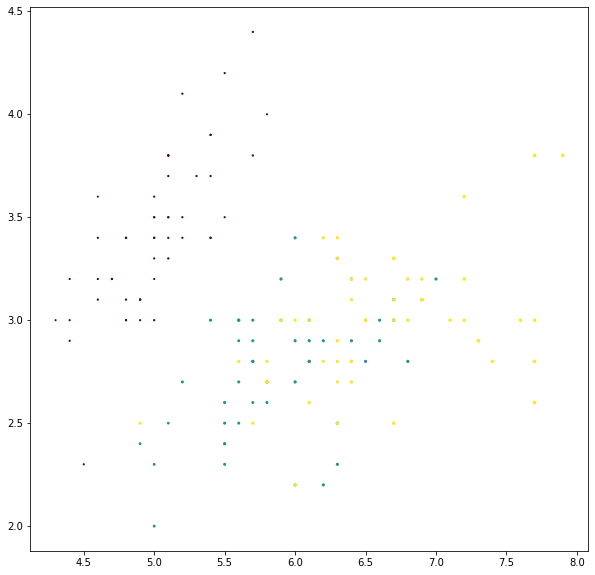

In [31]:
plt.subplots(figsize=(10, 10))
plt.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=y)
plt.show()

#### Split our data into training and testing 

In [32]:
#import train_test_split library
from sklearn.model_selection import train_test_split
#split our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Choose a model and train it and then predict, let's try using Decision Tree Classifier

In [34]:
#import our model from sklearn
from sklearn.tree import DecisionTreeClassifier
#initialize our model
clf = DecisionTreeClassifier(random_state=0)
#fit our model
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [35]:
# create a new variable that contains all the predicted values for our train set
y_pred_train= clf.predict(X_train)

# create a new variable that contains all the predicted values for our test set
y_pred_test= clf.predict(X_test)

#### Evaluate how well our model did on the train set and on the test set

In [36]:
#import your choice of evaluation metric from sklearn.metrics
from sklearn.metrics import accuracy_score

#calculate the evaluation for the train set
accuracy_train= accuracy_score(y_train, y_pred_train)*100

#calculate the evaluation for the test set
accuracy_test= accuracy_score(y_test, y_pred_test)*100


print("Accuracy score for training set is {}.".format(accuracy_train))
print("Accuracy score for test set is {}.".format(accuracy_test))

Accuracy score for training set is 100.0.
Accuracy score for test set is 96.66666666666667.


#### Implementing Hyperparameter Tuning

##### Let's take a look at some of our hyperparameters for the DecisionTreeClassifier in scikit learn:
1. criterion ---> {“gini”, “entropy”}, default=”gini”
    The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

2. splitter ---> {“best”, “random”}, default=”best”
    The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” 
    to choose the best random split.

3. max_depth --->
   The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain
   less than min_samples_split samples.

4. min_samples_split ---> The minimum number of samples required to split an internal node

You can also refer to the documentation to know more: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier


In [46]:
# Import Grid Search from Sklearn

from sklearn.model_selection import GridSearchCV
# Initialize your classifier
params = {'criterion': ["gini", "entropy"], 'splitter':['best', 'random'], 'max_depth':range(1,50), 'min_samples_split':[1,3,6,8]}

grid = GridSearchCV(clf, params, n_jobs=-1)

#create a dictionary with the hyperparameters you want to choose from


#apply GridSearchCV to your classifier and parameters
grid.fit(X_train,y_train )
 
# fit the model for grid search


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
980 fits failed out of a total of 3920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
980 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 50),
                         'min_samples_split': [1, 3, 6, 8],
                         'splitter': ['best', 'random']})

#### Find the best parameters and the best score

In [47]:

# print best parameter after tuning
print("The best parameters for tuning our model {}".format(grid.best_params_))
 
# print how our model looks after hyper-parameter tuning
print("Our best model: {}".format(grid.best_estimator_))

#print the highest score
print("Highest score: {}".format(grid.best_score_))

The best parameters for tuning our model {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 6, 'splitter': 'random'}
Our best model: DecisionTreeClassifier(max_depth=8, min_samples_split=6, random_state=0,
                       splitter='random')
Highest score: 0.9666666666666668


In [44]:
# Import Grid Search from Sklearn

from sklearn.model_selection import RandomizedSearchCV
# Initialize your classifier
params = {'criterion': ["gini", "entropy"], 'splitter':['best', 'random'], 'max_depth':range(1,50), 'min_samples_split':[1,3,6,8]}

grid = RandomizedSearchCV(clf, params, n_jobs=-1)

#create a dictionary with the hyperparameters you want to choose from


#apply GridSearchCV to your classifier and parameters
grid.fit(X_train,y_train )
 
# fit the model for grid search



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a float i

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 50),
                                        'min_samples_split': [1, 3, 6, 8],
                                        'splitter': ['best', 'random']})

#### Find the best parameters and the best score

In [45]:

# print best parameter after tuning
print("The best parameters for tuning our model {}".format(grid.best_params_))
 
# print how our model looks after hyper-parameter tuning
print("Our best model: {}".format(grid.best_estimator_))

#print the highest score
print("Highest score: {}".format(grid.best_score_))

The best parameters for tuning our model {'splitter': 'random', 'min_samples_split': 6, 'max_depth': 19, 'criterion': 'gini'}
Our best model: DecisionTreeClassifier(max_depth=19, min_samples_split=6, random_state=0,
                       splitter='random')
Highest score: 0.9666666666666668


#### Which do you think is the better method for hyperparameter tuning? Are there better methods for tunning our hyperparameters? 

In [43]:
# GridSearch is a better method for tuning if we have the luxury of longer training times as it takes more time to run
# However, random search offers way less runtime at the tradeoff of finding the optimal hyperparameters